# Mass Transports

Transport diagnostics for flow through major straits.

## Theory

Formally, mass transports are given by
$$T_x = \rho u  $$
$$T_y = \rho v  $$

Mass transports are diagnostics that are calculated online by the model:

|variable|long name|units|dimensions|
|-|
|tx_trans|T-cell i-mass transport|Sv|(time,st_ocean,xu_ocean,yt_ocean)|
|ty_trans|T-cell j-mass transport|Sv|(time,st_ocean,xt_ocean,yu_ocean)|


These variables are saved in `ocean.nc` files.

## Calculation

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
from dask.distributed import Client

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

import sys, os

In [3]:
session = cc.database.create_session()

In [3]:
## To implement, use:
## dask-scheduler
## dask-worker tcp://10.0.64.18:8786 --memory-limit 4e9 --nprocs 6 --nthreads 1 --local-directory /local/g40/amh157
#client = Client('tcp://10.0.64.22:8786', local_dir='/local/g40/amh157')
# simpler option:
client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:39549 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 34.36 GB


In [4]:
xmin=-69.9
ymin=-71.6
ymax=-51.0

# Drake Passage Transport

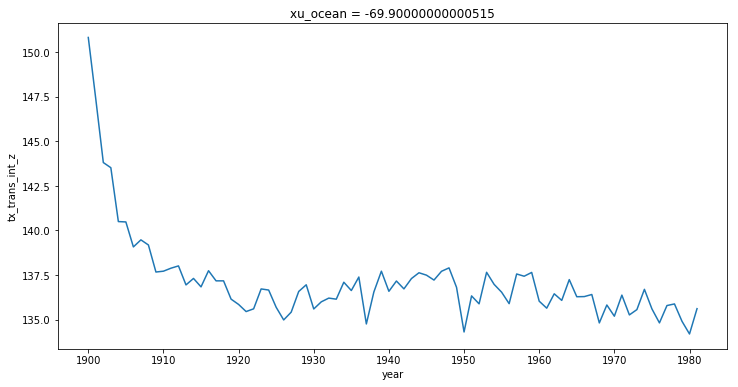

In [5]:
plt.figure(figsize=(12,6))
control_expt = '01deg_jra55v13_ryf9091'
tx_trans = cc.querying.getvar(expt,'tx_trans_int_z',session)
control_transport = tx_trans.groupby('time.year').mean(dim='time')\
                            .sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('yt_ocean')/1e6/1036
control_transport.plot(label=control_expt)

01deg_jra55_SAMextr_1011_from9091_kial
01deg_jra55_SAMextr_9899_from9091
01deg_jra55_SAMextr_0203_from9091
01deg_jra55_SAMextr_9192_from9091


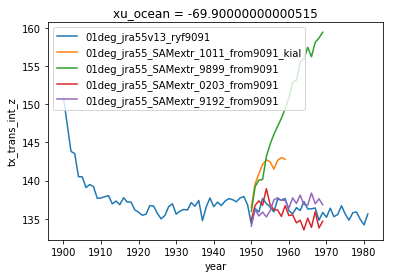

In [6]:
## for comparison
plt.figure(figsize=(12,6))
control_transport.plot(label=control_expt)
expt_list = ['01deg_jra55_SAMextr_1011_from9091_kial',
        '01deg_jra55_SAMextr_9899_from9091','01deg_jra55_SAMextr_0203_from9091',
        '01deg_jra55_SAMextr_9192_from9091']
for expt in expt_list:
    print(expt)
    tx_trans = cc.querying.getvar(expt,'tx_trans_int_z',session)
    transport = tx_trans.groupby('time.year').mean(dim='time')\
                            .sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('yt_ocean')/1e6/1036
    transport.plot(label=expt)
plt.legend()
plt.title('Drake Passage Transport')
plt.ylabel('Transport (Sv)')
plt.xlabel('Year')